<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM3/Natural%20Language%20Processing/CIA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Shiladitya **2348556** 🎧

##**Program 1**

##Importing necessary libraries

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.utils import tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as pt
from collections import Counter
import numpy as np
from sklearn.decomposition import PCA
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
# %pip install svgling

##Dependencies

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

##The given text

In [ ]:
text = \
'''
Transformer is an exceptional innovation in the field of Deep Learning, contributed by Ashish
Vaswani et al. (2017), Google. The transformer is the most influential Neural Network model that has
shown outstanding performance on various NLP tasks including Machine Reading Comprehension,
Machine translation and sentence classification. Attention mechanism and parallelization are the
prominent features in the transformers. Consequently, it can facilitate long-range dependencies
without any gradient vanishing or gradient explosion problems and it overcomes the drawbacks of
the existing methods such as RNN and LSTM. The transformer is executed with an encoder-decoder
mechanism and the original article of transformers # “Attention All You Need”.
'''

##Performing Tokenization

###Word tokenization

In [ ]:
word_tokens = word_tokenize(text)
print("Word Tokenization:", word_tokens)

Word Tokenization: ['Transformer', 'is', 'an', 'exceptional', 'innovation', 'in', 'the', 'field', 'of', 'Deep', 'Learning', ',', 'contributed', 'by', 'Ashish', 'Vaswani', 'et', 'al', '.', '(', '2017', ')', ',', 'Google', '.', 'The', 'transformer', 'is', 'the', 'most', 'influential', 'Neural', 'Network', 'model', 'that', 'has', 'shown', 'outstanding', 'performance', 'on', 'various', 'NLP', 'tasks', 'including', 'Machine', 'Reading', 'Comprehension', ',', 'Machine', 'translation', 'and', 'sentence', 'classification', '.', 'Attention', 'mechanism', 'and', 'parallelization', 'are', 'the', 'prominent', 'features', 'in', 'the', 'transformers', '.', 'Consequently', ',', 'it', 'can', 'facilitate', 'long-range', 'dependencies', 'without', 'any', 'gradient', 'vanishing', 'or', 'gradient', 'explosion', 'problems', 'and', 'it', 'overcomes', 'the', 'drawbacks', 'of', 'the', 'existing', 'methods', 'such', 'as', 'RNN', 'and', 'LSTM', '.', 'The', 'transformer', 'is', 'executed', 'with', 'an', 'encoder

###Sentence tokenization

In [ ]:
sent_tokens = sent_tokenize(text)
print("Sentence Tokenization:", sent_tokens)

Sentence Tokenization: ['\nTransformer is an exceptional innovation in the field of Deep Learning, contributed by Ashish\nVaswani et al.', '(2017), Google.', 'The transformer is the most influential Neural Network model that has\nshown outstanding performance on various NLP tasks including Machine Reading Comprehension,\nMachine translation and sentence classification.', 'Attention mechanism and parallelization are the\nprominent features in the transformers.', 'Consequently, it can facilitate long-range dependencies\nwithout any gradient vanishing or gradient explosion problems and it overcomes the drawbacks of\nthe existing methods such as RNN and LSTM.', 'The transformer is executed with an encoder-decoder\nmechanism and the original article of transformers # “Attention All You Need”.']


In [ ]:
# We have to convert the words to lowercase to properly remove all the stopwords.
for i in range(len(word_tokens)):
  word_tokens[i] = word_tokens[i].lower()

##Removing stopwords

In [ ]:
stop_words = set(stopwords.words('english'))
word_tokens = [token for token in word_tokens if token not in stop_words]
word_tokens[:6] #seeing the first 6 tokens.
                #compare and notice that is, an, in are all removed.

['transformer', 'exceptional', 'innovation', 'field', 'deep', 'learning']

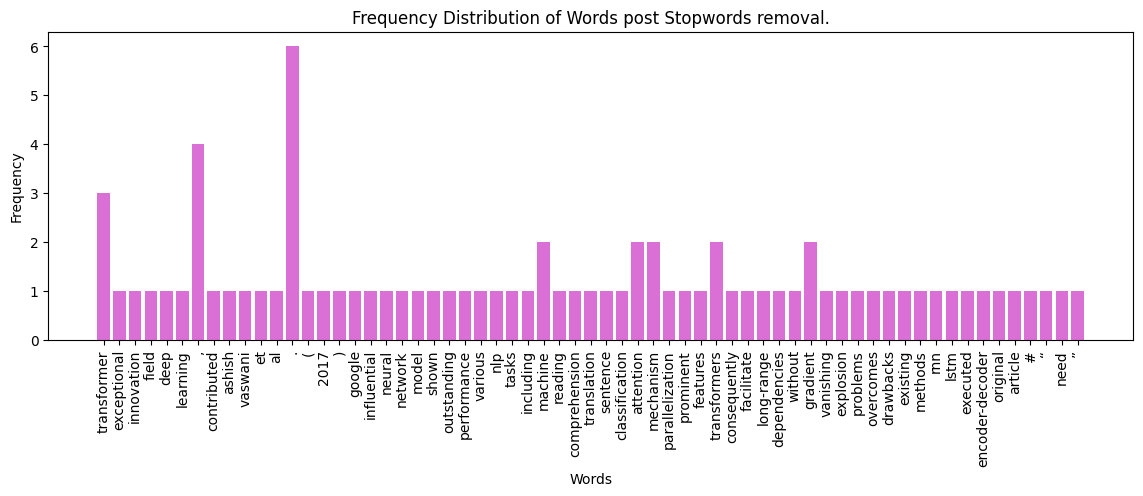

In [ ]:
word_freq = Counter(word_tokens)
pt.figure(figsize=(14, 4))
pt.bar(word_freq.keys(), word_freq.values(), color='orchid')
pt.xlabel('Words')
pt.ylabel('Frequency')
pt.title('Frequency Distribution of Words post Stopwords removal.')
pt.xticks(rotation=90);

##Removing punctuations

In [ ]:
def remove_punctuation(text):
  pattern = re.compile(r'[^\w\s]')
  text_ = re.sub(pattern, '', text)
  return text_
text = remove_punctuation(text)
word_tokens = word_tokenize(text) #updating word_tokens for downstream...
word_tokens = [token for token in word_tokens if token not in stop_words]
text

'\nTransformer is an exceptional innovation in the field of Deep Learning contributed by Ashish\nVaswani et al 2017 Google The transformer is the most influential Neural Network model that has\nshown outstanding performance on various NLP tasks including Machine Reading Comprehension\nMachine translation and sentence classification Attention mechanism and parallelization are the\nprominent features in the transformers Consequently it can facilitate longrange dependencies\nwithout any gradient vanishing or gradient explosion problems and it overcomes the drawbacks of\nthe existing methods such as RNN and LSTM The transformer is executed with an encoderdecoder\nmechanism and the original article of transformers  Attention All You Need\n'

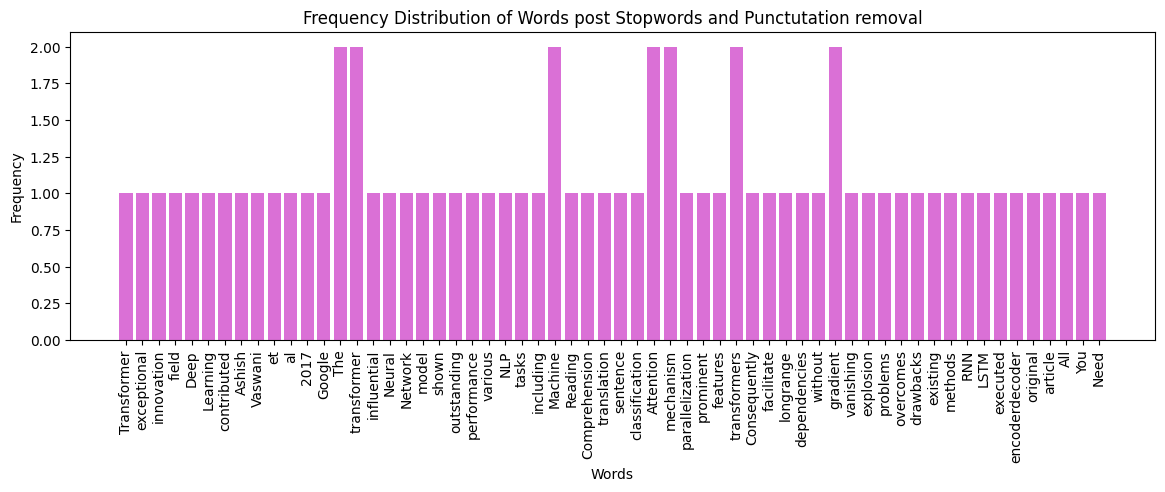

In [ ]:
word_freq = Counter(word_tokens)
pt.figure(figsize=(14, 4))
pt.bar(word_freq.keys(), word_freq.values(), color='orchid')
pt.xlabel('Words')
pt.ylabel('Frequency')
pt.title('Frequency Distribution of Words post Stopwords and Punctutation removal')
pt.xticks(rotation=90);

##Performing Stemming

###Using PorterStemmer

In [ ]:
porter_stemmer = PorterStemmer()
word_porter = []
for word in word_tokens:
  word_porter.append(porter_stemmer.stem(word))
word_porter[:6] #seeing the first 6 stemmed words.
                #compare with above.

['transform', 'except', 'innov', 'field', 'deep', 'learn']

###Using SnowballStemmer

In [ ]:
snowball_stemmer = SnowballStemmer(language='english')
word_snow = []
for word in word_tokens:
  word_snow.append(snowball_stemmer.stem(word))
word_snow[:6] #seeing the first 6 stemmed words.
                #compare with above.

['transform', 'except', 'innov', 'field', 'deep', 'learn']

##Performing Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
word_lemma = [lemmatizer.lemmatize(token) for token in word_tokens]
word_lemma[:6] #seeing the first 6 lemmatized words.
               #compare with above.

['Transformer', 'exceptional', 'innovation', 'field', 'Deep', 'Learning']

##PoS Tagging

In [ ]:
words_tag = nltk.pos_tag(word_tokens)
words_tag[:6]

[('Transformer', 'NNP'),
 ('exceptional', 'JJ'),
 ('innovation', 'NN'),
 ('field', 'NN'),
 ('Deep', 'NNP'),
 ('Learning', 'NNP')]

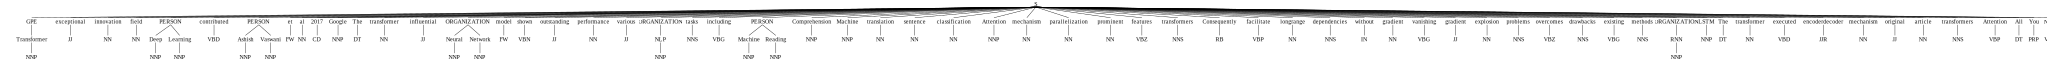

In [ ]:
words_ne = nltk.ne_chunk(words_tag)
words_ne

##**Program 2**

In [ ]:
text = \
'''
Mickey Mouse, a cheerful and optimistic mouse clad in red
shorts and yellow shoes, is the iconic mascot of The Walt Disney Company. Debuting in 1928,
this spunky character has charmed audiences for generations with his adventures and can-do
attitude.
'''

In [ ]:
sent_tokens = sent_tokenize(text)
se = []
for _ in sent_tokens:
  words = word_tokenize(_)
  se.append(words)
# Function to train and visualize word vectors
def work(type, se):
    # Train Word2Vec model
    if type == 'skipgram':
        model = Word2Vec(se, sg=1, vector_size=10, window=5, min_count=1, workers=4)
    elif type == 'cbow':
        model = Word2Vec(se, sg=0, vector_size=10, window=5, min_count=1, workers=4)

    # Extract word vectors
    wdv = model.wv

    # Visualize word vectors
    words = list(wdv.key_to_index.keys())
    words_em = wdv[words]

    # Dimensionality reduction using PCA
    pca = PCA(n_components=2)
    words_em2d = pca.fit_transform(words_em)

    # Plot word vectors in 2D plane
    pt.figure(figsize=(10, 8))
    pt.scatter(words_em2d[:, 0], words_em2d[:, 1], c='mediumorchid')

    for i, word in enumerate(words):
        pt.annotate(word, xy=(words_em2d[i, 0], words_em2d[i, 1]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom', color='navy')

    pt.title(f'Word Vectors Visualization ({type})')
    pt.xlabel('Principal Component 1')
    pt.ylabel('Principal Component 2')
    pt.show()

##Skip-gram

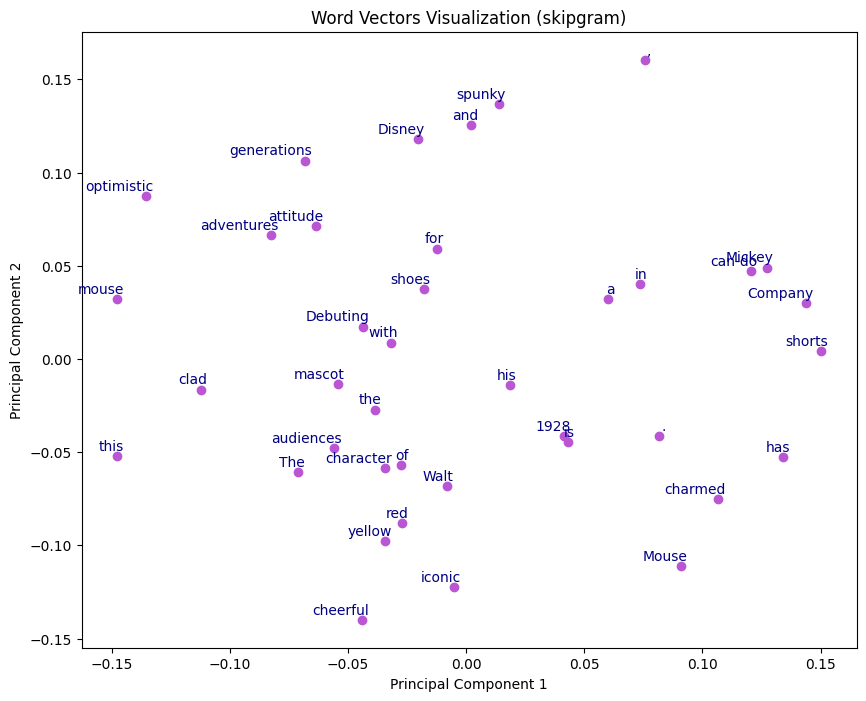

In [ ]:
# Train and visualize Skip-gram model
work('skipgram', se)

##Continuous Bag of Words

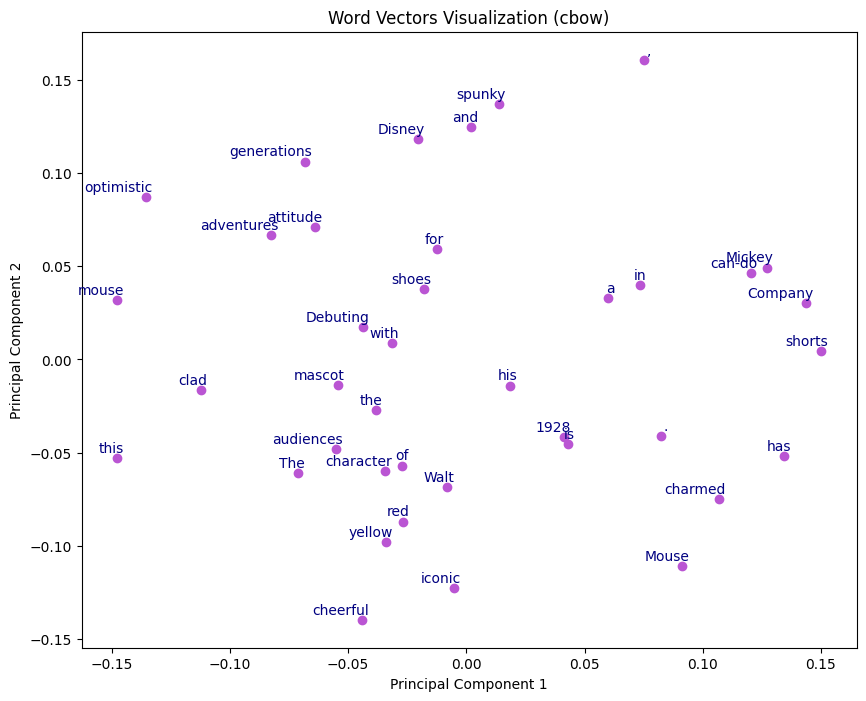

In [ ]:
# Train and visualize CBOW model
work('cbow', se)

## Workflow of the code:
- First we tokenize according to the sentences. Then we split each in words and append it in a list such that my list has this shape -
`[[]]`
- We define a function `work()` to train the `Word2Vec` model (either `Skip-gram` or `CBOW`) and visualize the word vectors.
- Within this function, we train the `Word2Vec` model using `Word2Vec` from `gensim.models`.
- We extract the word vectors from the trained model and perform dimensionality reduction using `Principal Component Analysis`. This is required because we want to visualize the vectors in a `2D` plane and the vectors are in the `10th` dimension.
- We finally plot the word vectors in a `2D plane`.

####Brief Summary

Skip-gram and Continuous Bag of Words (CBOW) are two prominent algorithms employed in Word2Vec, a widely-utilized technique for generating word embeddings in natural language processing. In the Skip-gram model, the focus lies on predicting the context words (the words surrounding a target word) given the target word itself. By maximizing the probability of context words given the target word, Skip-gram effectively learns to capture semantic relationships and word similarities. This predictive approach allows the model to comprehend the meaning of words based on their surrounding context, facilitating the extraction of meaningful word embeddings that encode semantic information.


On the other hand, Continuous Bag of Words (CBOW) operates in a slightly different manner. Unlike Skip-gram, CBOW's objective is to predict the target word given its context, which consists of surrounding words. By maximizing the probability of the target word given its context, CBOW focuses on learning to predict the target word based on the words surrounding it. This approach tends to be faster to train and performs well on frequent words, making it suitable for processing large datasets efficiently. However, CBOW may not capture as nuanced relationships between words compared to Skip-gram. Despite their differences, both Skip-gram and CBOW play pivotal roles in understanding the semantic and syntactic structure of natural language, enabling a plethora of downstream tasks in NLP, such as sentiment analysis, machine translation, and named entity recognition.